In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym

plt.style.use(['science', 'notebook', 'grid', 'default', 'bright'])

plot_height = 15    #Plot size parameters
plot_width = plot_height*1.618

SMALL_SIZE = 35    #used to adjust figure font size
MEDIUM_SIZE = 50
BIGGER_SIZE = 65

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', titlesize=BIGGER_SIZE)    # actually gets title font size (glitch in matplotlib?)


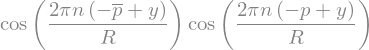

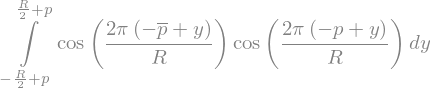

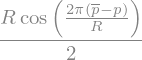

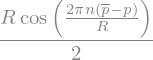

In [54]:
An, R, p, pbar, y = sym.symbols('A_n, R, p, \overline{p}, y', real=True)
n = sym.symbols('n', integer=True, positive=True)
In = sym.symbols('In', cls=sym.Function)
kernel_1 = sym.cos(2*sym.pi/R*(y - p))*sym.cos(2*sym.pi/R*(y - pbar))
kernel_n = sym.cos(2*sym.pi*n/R*(y - p))*sym.cos(2*sym.pi*n/R*(y - pbar))

display(kernel_n)
display(sym.Integral(kernel_1, (y, p-R/2, p+R/2)))

display(sym.integrate(kernel_1, (y, p-R/2, p+R/2)).simplify())
display(sym.integrate(kernel_n, (y, p-R/2, p+R/2)).simplify())


Weight: 


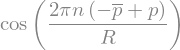

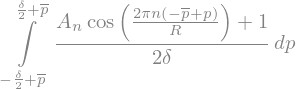

Average:


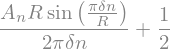

In [106]:
delta, p1, p2, pa = sym.symbols('\delta, p_1, p_2, p_a', real=True)
weight = sym.cos(2*sym.pi*n*(p-pbar)/R)
print('Weight: ')
display(weight)

display(sym.Integral((1 + An*weight)/(2*delta), (p, pbar-delta/2, pbar+delta/2)))

print('Average:')
ave = sym.integrate((1 + An*weight)/(2*delta), (p, pbar-delta/2, pbar+delta/2)).simplify()
display(ave)



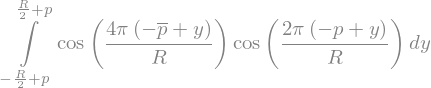

In [59]:
display(sym.Integral(sym.cos(2*sym.pi/R*(y - p))*sym.cos(4*sym.pi/R*(y - pbar)), (y, p-R/2, p+R/2)))
display(sym.integrate(sym.cos(2*sym.pi/R*(y - p))*sym.cos(4*sym.pi/R*(y - pbar)), (y, p-R/2, p+R/2)).simplify())


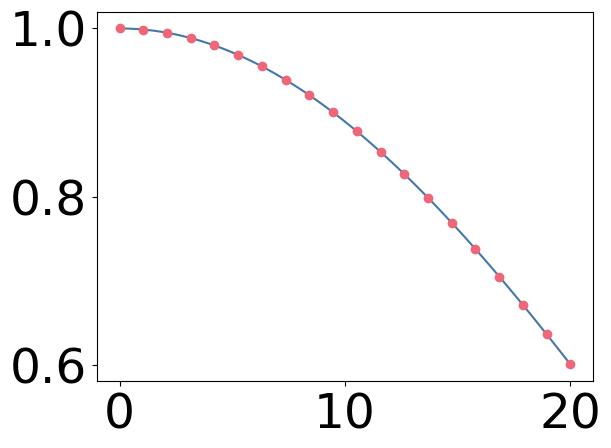

In [108]:
npos_fine = np.linspace(0,20,100)
npos = np.linspace(0,20,20)
res = 3.33
delta = .028

fig = plt.plot(npos_fine, np.sinc(np.pi*delta*npos_fine/res), '-')
plt.plot(npos, np.sinc(np.pi*delta*npos/res), 'o')
plt.show()
#print('Value:', np.sinc(np.pi*delta*npos/res))


Weight:


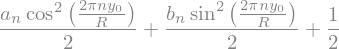

Integral to compute:


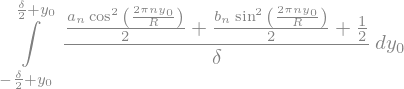

Average:


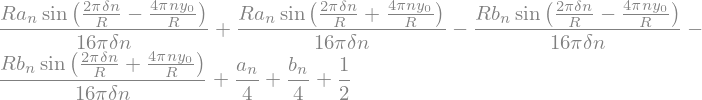

Limit as delta->0:


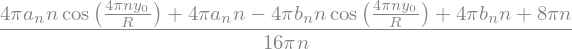

Difference:


Limit as delta->oo:


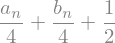

delta=m*res:


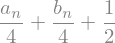

In [279]:
an, bn, y0 = sym.symbols('a_n, b_n, y_0', real=True)
delta, R = sym.symbols('\delta, R', real=True, positive=True)
m = sym.symbols('m', integer=True, positive=True)
arb = (1 + an*sym.cos(2*sym.pi*n/R*y0)**2 + bn*sym.sin(2*sym.pi*n/R*y0)**2)/2

print('Weight:')
display(arb.simplify())
print('Integral to compute:')
display(sym.Integral(arb/delta, (y0, y0-delta/2, y0+delta/2)))

print('Average:')
ave = sym.simplify(sym.integrate(arb/delta, (y0, y0-delta/2, y0+delta/2)))
display(ave.expand())
print('Limit as delta->0:')
lim = sym.limit(ave, delta, 0).trigsimp()
display(lim)
print('Difference:')
display((lim - arb).simplify())

print('Limit as delta->oo:')
lim_inf = sym.limit(ave, delta, sym.oo).simplify()
display(lim_inf)
print('delta=m*res:')
display(ave.subs(delta,m*R).simplify())


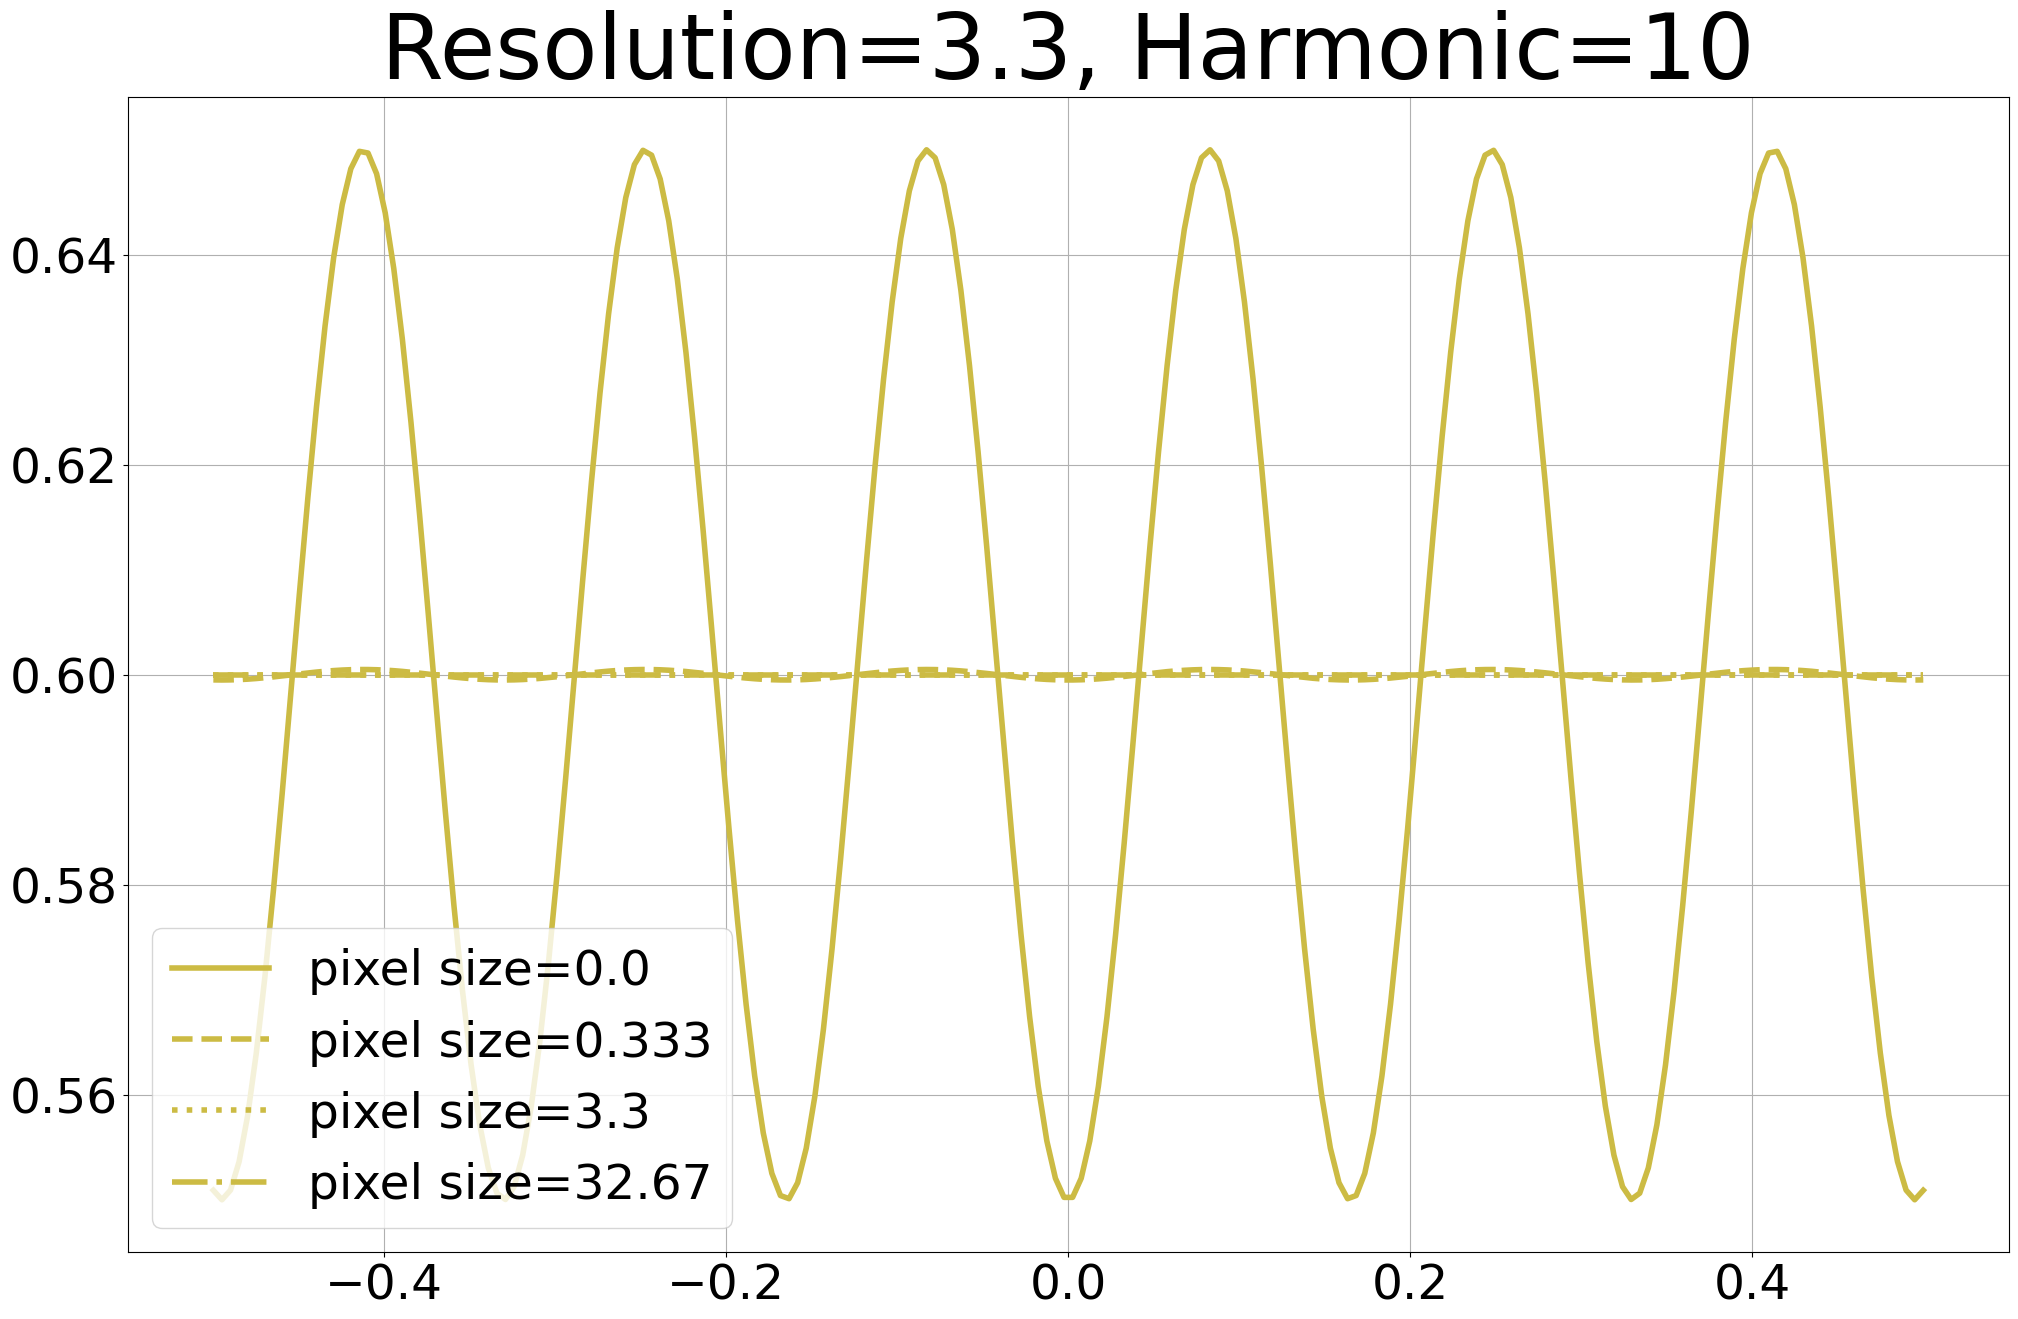

In [277]:
lres = 3.3
ldel = lres/9.3
xpos = np.linspace(-.5,.5,200)
lan = .1
lbn = .3
lh = 5
f = sym.lambdify([an, bn, n, y0, R, delta], ave)

sty = ['-','--',':','-.']
d_pix = [lres/9.9e9, lres/9.9, lres, lres*9.9]
fig = plt.figure(figsize=(plot_width,plot_height))
for lh in [10]:
    color='C'+str(lh)
    for ldel in range(len(d_pix)):
        plt.plot(xpos, f(lan, lbn, lh, xpos, lres, d_pix[ldel]), linestyle=sty[ldel], \
                 label='pixel size=' + str(round(d_pix[ldel],3)), linewidth=4, color=color)
plt.title('Resolution='+str(round(lres,5))+', Harmonic='+str(lh))
plt.grid()
plt.legend()
plt.show()
